# **Twitter Sentiment Analysis**

### **Objective**
The objective of this project is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

# **Our End to End Project_Pipeline**


1.   Data Acquisition
2.   Text Preprocessing
3.   Visualizatio
4.   Feature Engineering
5.   Model Building
6.   Model Evaluation
7.   Project Summary








# **Importing Libraries**

In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category = DeprecationWarning)

# **Data Loading**

In [3]:
train = pd.read_csv("/content/train_E6oV3lV.csv")
test = pd.read_csv("/content/test_tweets_anuFYb8.csv")

In [4]:
train.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [5]:
test.columns

Index(['id', 'tweet'], dtype='object')

# **Data Inspection**



In [6]:
# let us checkout few no racist tweets-
train[train['label']== 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [7]:
# Let us check few racist tweets
train[train['label']== 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [8]:
# check dimensions of traina and test Data
train.shape,test.shape

((31962, 3), (17197, 2))

In [9]:
# Let us check the Distribution of Label
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

#### In the Train Dataset we have 2242(7%) tweets labelled as racist and 29720(93%) tweets labeled as non racist. So it is an Imbalanced Data

### Now we will check the Distribution of Length of the Tweets, in terms of words in the train and test data.

In [10]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

### **Plotting Length Distribution of tweets**

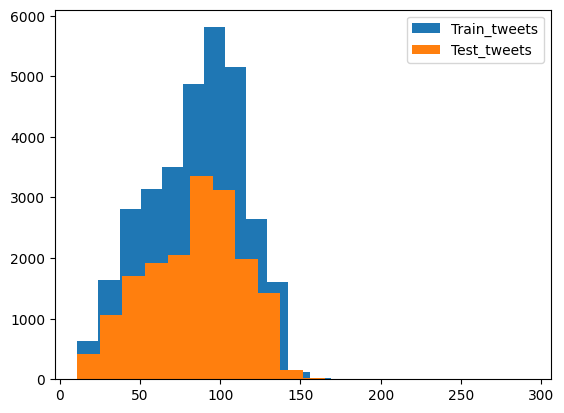

In [11]:
plt.hist(length_train,bins = 20, label ="Train_tweets")
plt.hist(length_test,bins = 20, label ="Test_tweets")
plt.legend()
plt.show()


# **Data Cleaning**
let us combine the training and test data and preprocess it-

In [12]:
# Combine the train and test DataFrames
combi = pd.concat([train, test], ignore_index=True)

# Print the shape of the combined DataFrame
print(combi.shape)

(49159, 3)


# **Removing Unwanted Pattern**

In [13]:
import re

def remove_pattern(input_txt, pattern):
    # Find all occurrences of the specified pattern in the input text
    r = re.findall(pattern, input_txt)

    # Replace each occurrence with an empty string
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    # Return the modified input text
    return input_txt


# **Remove Twitter Handles(@user)**

In [14]:
# Apply the remove_pattern function to each tweet in the 'tweet' column
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# Display the first few rows of the resulting DataFrame
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# **Remove Punctuation,Numbers and Special Characters**

In [15]:
# Apply the remove_pattern function to each tweet in the 'tweet' column
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# Display the first few rows of the resulting DataFrame
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# **Remove Short words**

In [16]:
# Apply a lambda function to each tweet in the 'tidy_tweet' column
# Keep only words with a length greater than 3 characters
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

# Display the resulting DataFrame
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


# **Tokenisation**
* Tokenization is the process of splitting a string of text into individual terms or words.
* In our code snippet, you’ve tokenized the 'tidy_tweet' column by splitting each tweet into a list of words.
* For example, the first tweet is tokenized into the list: ['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run'].

In [17]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
# Import necessary modules
import nltk
from nltk.tokenize import word_tokenize

# Tokenize each tweet in the 'tidy_tweet' column
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: word_tokenize(x))

# Display the resulting tokenized tweets
tokenized_tweet.head()


0                                           [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, ., #, run]
1    [thanks, #, lyft, credit, ca, n't, cause, they, do, n't, offer, wheelchair, vans, pdx, ., #, disapointed, #, getthanked]
2                                                                                                     [bihday, your, majesty]
3                                          [#, model, love, take, with, time, urð±, !, !, !, ðððð, ð¦ð¦ð¦]
4                                                                                     [factsguide, :, society, #, motivation]
Name: tidy_tweet, dtype: object

# **Stemming and Poststemmer**
* The next step is to normalize the words using stemming. We’ll use NLTK’s PorterStemmer() function.
* Stemming reduces words to their root/base form. For example, it converts variations like “running,” “runs,” and “ran” to the common root “run.”
* We can apply stemming to each word in the tokenized tweets.

In [19]:
# Import the PorterStemmer class from NLTK
from nltk.stem.porter import PorterStemmer

# Create an instance of PorterStemmer
stemmer = PorterStemmer()

# Apply stemming to each word in the tokenized_tweet column
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

# Stitch the stemmed tokens back together into complete sentences
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

# Assign the result back to the 'tidy_tweet' column in the combi DataFrame
combi['tidy_tweet'] = tokenized_tweet



# **Text Visualization**

### **Understanding common words used in Tweets using wordcloud**

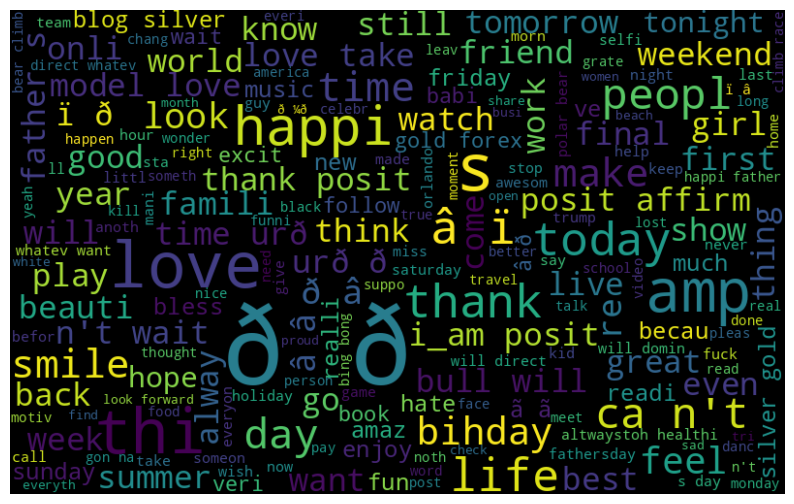

In [20]:
# Concatenate all cleaned tweets into a single string
all_words = ' '.join([text for text in combi['tidy_tweet']])

# Create a WordCloud object
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### **words in non-racist**

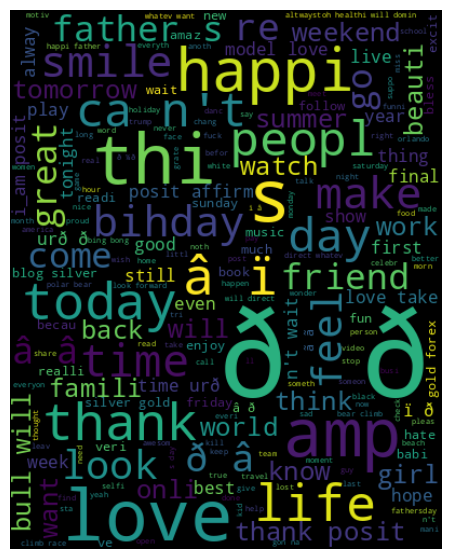

In [21]:
# Concatenate all cleaned tweets into a single string
all_words = ' '.join([text for text in combi['tidy_tweet']])

# Create a WordCloud object
from wordcloud import WordCloud
wordcloud = WordCloud(width=400, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### **words in Racist**

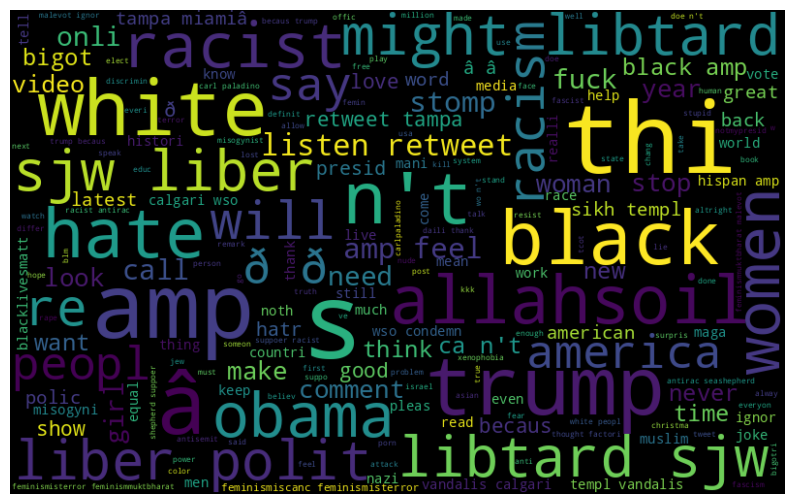

In [22]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned tweets with negative sentiment (label 1) into a single string
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### D) **Understanding the impact of Hashtags on tweets sentiment**
* Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time.
* We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [23]:
def hashtag_extract(x):
  hashtags = []
  # Loop over the words in the tweet
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.extend(ht)
  return hashtags

In [24]:
# extracting hashtags from racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [25]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

In [26]:
# unnesting list
HT_reg = sum(HT_regular,[])
HT_neg = sum(HT_negative,[])

# **Plotting Top N Hashtags**

## **For Non-Racist**

In [27]:
a = nltk.FreqDist(HT_reg)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})


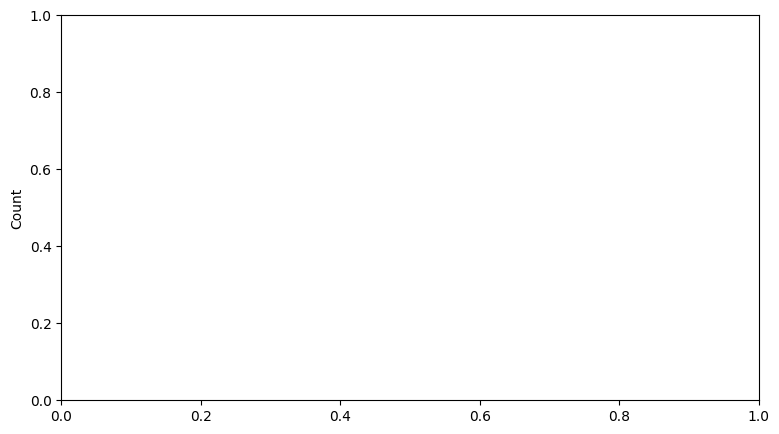

In [28]:
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(9,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **For Racist**

In [29]:
b = nltk.FreqDist(HT_neg)
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})


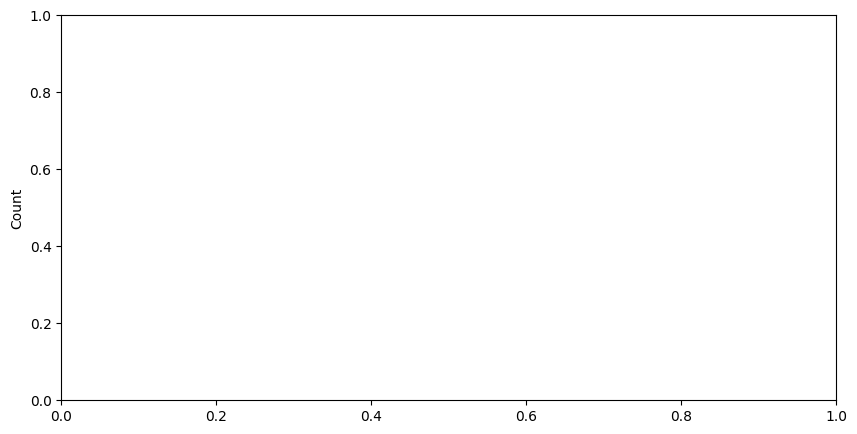

In [30]:
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# **Bag of Words-Feature Engineering**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [32]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape


(49159, 1000)

### **TF-IDF Features**

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

# **Word2Vec Features**

In [34]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(tokenized_tweet, vector_size=200, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(8189855, 12208020)

In [35]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(8189476, 12208020)

In [36]:
model_w2v.wv.most_similar(positive="dinner")

[('bolognes', 0.5058491826057434),
 ('ð\x9f\x8d´ð\x9f\x8d·i', 0.4917439818382263),
 ('spaghetti', 0.49047788977622986),
 ('goodtimesâ\x80¦', 0.4839482605457306),
 ('dxb', 0.480233758687973),
 ('iftar', 0.4664299190044403),
 ('bihdaydinn', 0.46243003010749817),
 ('lastnight', 0.45594367384910583),
 ('foodblogg', 0.45406830310821533),
 ('pasta', 0.452973335981369)]

In [37]:
model_w2v.wv.most_similar(positive="trump")

[('won-they', 0.5160751342773438),
 ('truism', 0.5081835985183716),
 ('irrefut', 0.5072000622749329),
 ('presidentelect', 0.5014822483062744),
 ('co-chairman', 0.49972838163375854),
 ('presumpt', 0.4931083619594574),
 ('tomlin', 0.4903334677219391),
 ('booâ\x80¦', 0.4860548973083496),
 ('donald', 0.48577991127967834),
 ('trumpleak', 0.48475778102874756)]

In [38]:
food_vector = model_w2v.wv['food']

In [39]:

food_vector

array([-7.77295902e-02, -4.07321006e-01, -2.05191836e-01,  9.08753335e-01,
       -1.04293084e+00,  3.38777900e-01, -1.10173273e+00, -2.43129715e-01,
       -1.61392376e-01,  4.08304274e-01,  1.48486704e-01,  5.50415218e-01,
        9.43766758e-02,  4.45943028e-01,  4.84033406e-01, -1.51116163e-01,
        2.33789220e-01, -5.83077222e-03, -2.71053404e-01,  4.56850231e-01,
       -1.81356758e-01,  1.04492056e+00, -1.15683034e-01,  1.44951856e-02,
       -3.65371704e-01,  1.05113879e-01, -8.46985817e-01, -4.39192683e-01,
        3.97055835e-01,  5.33661723e-01, -5.79798734e-03,  6.22765362e-01,
       -3.97795476e-02, -2.61003017e-01,  4.96540964e-01,  1.91705838e-01,
        1.52463168e-01,  4.07805800e-01,  3.12100440e-01,  1.05668612e-01,
       -1.40506066e-02, -2.70561725e-01, -2.53631443e-01, -1.59835503e-01,
       -1.91643372e-01,  1.22220397e-01,  3.00623894e-01, -1.67851761e-01,
        1.77116785e-02, -4.71808374e-01,  4.75894690e-01, -9.41239074e-02,
        4.13462788e-01, -

# **Preparing vectors for tweets**

In [44]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
        return vec

### **preparing word2vec featureSet**

In [42]:
#!pip install gensim

In [43]:
from gensim.models import Word2Vec

In [45]:
# preparing word2vec featureSet
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

# **Logistic_Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# **Extracting Bag-of-Words (BoW) Features**

In [47]:
train_bow = bow[:31962, :]
test_bow = bow[31962:, :]


# **Splitting Data into Training and Validation Sets:**

In [48]:

from sklearn.model_selection import train_test_split

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
random_state=42, test_size=0.3)


In [49]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()


In [50]:
lreg.fit(xtrain_bow, ytrain)


LogisticRegression()

In [51]:
prediction = lreg.predict_proba(xvalid_bow)


In [52]:
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)


# **Model Evaluation: Calculating F1_Score**

In [53]:
from sklearn.metrics import f1_score

f1 = f1_score(yvalid, prediction_int)


In [54]:
print("The F1_Score of Logistic_Regression Model is:", f1)

The F1_Score of Logistic_Regression Model is: 0.5472636815920398


#**Support Vector Machine**

In [55]:
import sklearn.svm as svm

# **Bag of Words Features**

In [56]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

In [57]:
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

In [58]:
f1_score(yvalid, prediction_int)


0.5096241979835013

**Again let’s make predictions for the test dataset and create another submission file.**

In [59]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svm_bow.csv', index=False)

# **Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier

# **Bag of Words Features**

In [61]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)

In [62]:
print(f1_score(yvalid, prediction))

0.5363565285379203


In [63]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

# **XG Boost**

In [64]:
from xgboost import XGBClassifier

# **Bag of Words Features**

In [65]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5343092406221409

# **TFID Features**

In [66]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [67]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5361930294906165

# **Word2Vector Features**

In [69]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [70]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1 = f1_score(yvalid, prediction)
print("The F1 score of XG BOOST on WordVec Features is", f1)

The F1 score of XG BOOST on WordVec Features is 0.6552346570397112


### **XGBoost with Word2Vec model has given us the best performance so far with a best score of 0.65. Let’s try to tune it further to extract as much from it as we can.**

# **Hyper-parameter Tuning on XG Boost**

In [71]:
import xgboost as xgb

### **we will use DMatrices: A DMatrix can contain both the features and the target.**

In [72]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [73]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

### **We will prepare a custom evaluation metric to calculate F1 score.**

In [79]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    preds = (preds >= 0.3).astype(int)
    return [('f1_score', f1_score(labels, preds))]

# **General Approach for Parameter Tuning**
## We will follow the steps below to tune the parameters.
* Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
* Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
* Tune the learning rate.
* Finally tune gamma to avoid overfitting.
* Tuning max_depth and min_child_weight

In [80]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


In [81]:
# Cross-validation
cv_results = xgb.cv(params,dtrain,feval= custom_eval,
                    num_boost_round=200,
                    maximize=True,
                    seed=16,nfold=5,
                    early_stopping_rounds=10)

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


In [82]:
# Finding best F1 Score

mean_f1 = cv_results['test-f1_score-mean'].max()

boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


	F1 Score 0.6426978000000001 for 85 rounds
Best params: 9, 7, F1 Score: 0.6426978000000001


### Updating max-depth and Min_child_weight parameters

In [83]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [84]:
#Tuning subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
  print("CV with subsample={}, colsample={}".format(subsample,colsample))

CV with subsample=0.5, colsample=0.5
CV with subsample=0.5, colsample=0.6
CV with subsample=0.5, colsample=0.7
CV with subsample=0.5, colsample=0.8
CV with subsample=0.5, colsample=0.9
CV with subsample=0.6, colsample=0.5
CV with subsample=0.6, colsample=0.6
CV with subsample=0.6, colsample=0.7
CV with subsample=0.6, colsample=0.8
CV with subsample=0.6, colsample=0.9
CV with subsample=0.7, colsample=0.5
CV with subsample=0.7, colsample=0.6
CV with subsample=0.7, colsample=0.7
CV with subsample=0.7, colsample=0.8
CV with subsample=0.7, colsample=0.9
CV with subsample=0.8, colsample=0.5
CV with subsample=0.8, colsample=0.6
CV with subsample=0.8, colsample=0.7
CV with subsample=0.8, colsample=0.8
CV with subsample=0.8, colsample=0.9
CV with subsample=0.9, colsample=0.5
CV with subsample=0.9, colsample=0.6
CV with subsample=0.9, colsample=0.7
CV with subsample=0.9, colsample=0.8
CV with subsample=0.9, colsample=0.9


In [85]:
# Update our parameters
params['colsample'] = colsample
params['subsample'] = subsample
cv_results = xgb.cv(params,
                    dtrain,
                    feval= custom_eval,
                    num_boost_round=200,
                    maximize=True,
                    seed=16,
                    nfold=5,
                    early_stopping_rounds=10
                    )

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:50:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:50:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:50:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

In [86]:
# Finding best F1 Score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
  max_f1 = mean_f1
  best_params = (subsample, colsample)

	F1 Score 0.627671 for 43 rounds


In [87]:
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Best params: 0.9, 0.9, F1 Score: 0.627671


In [88]:
#Updating subsample and colsample_bytree
params['subsample'] = .9
params['colsample_bytree'] = .5

In [89]:
#Now let’s tune the learning rate.
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta
     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

CV with eta=0.3


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:55:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:55:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:55:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

CV with eta=0.2


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:57:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:57:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:57:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

CV with eta=0.1


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:58:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:58:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:58:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

CV with eta=0.05


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:00:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:00:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:00:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

CV with eta=0.01


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:05:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:05:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:05:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

CV with eta=0.005


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:06:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:06:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:06:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

In [91]:
# Finding best F1 Score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
  max_f1 = mean_f1
  best_params = eta

	F1 Score 0.0 for 0 rounds


In [92]:
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

Best params: None, F1 Score: 0.0


In [94]:
# Let’s have a look at the final list of tuned parameters.
params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 8,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

**Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.**

In [95]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:07:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	Validation-logloss:0.28650	Validation-f1_score:0.00000
[1]	Validation-logloss:0.28560	Validation-f1_score:0.00000
[2]	Validation-logloss:0.28479	Validation-f1_score:0.00000
[3]	Validation-logloss:0.28397	Validation-f1_score:0.00000
[4]	Validation-logloss:0.28315	Validation-f1_score:0.00000
[5]	Validation-logloss:0.28232	Validation-f1_score:0.00000
[6]	Validation-logloss:0.28145	Validation-f1_score:0.00000
[7]	Validation-logloss:0.28066	Validation-f1_score:0.00000
[8]	Validation-logloss:0.27987	Validation-f1_score:0.00000
[9]	Validation-logloss:0.27901	Validation-f1_score:0.00000
[10]	Validation-logloss:0.27820	Validation-f1_score:0.00000


In [98]:
# Let’s prepare one final submission file.
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(int)
submission = test[['id','label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

# **Project_Summary**

# Now it’s time to wrap-up things.
* Let’s quickly revisit what we have learned in this course, initially we cleaned our raw text data,

* then we learned about 4 different types of feature-set that we can extract from any text data, and

* finally we used these feature-sets to build models for sentiment analysis.

* Below is a summary table showing F1 scores for different models and feature-sets.

In [102]:
#!pip install opencv-python
import cv2

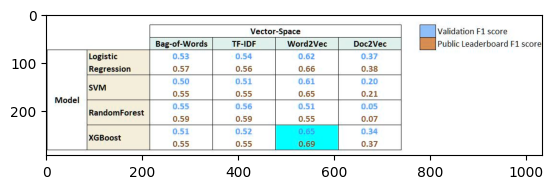

In [103]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img_path = "/content/blob.jpg"
img = cv2.imread(img_path)  # Read the image
plt.imshow(img)  # Display the image



* Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.
# **WHAT ELSE CAN BE TRIED?**
* We have covered a lot in this Sentiment Analysis course, but still there is plenty of room for other things to try out.
### Given below is a list of tasks that you can try with this data.

* We have built so many models in this Project, we can definitely try model ensembling. A simple ensemble of all the submission files (maximum voting) yielded an F1 score of 0.55 on the public leaderboard.

* Use Parts-of-Speech tagging to create new features.
* Use stemming and/or lemmatization. It might help in getting rid of unnecessary words.
* Use bi-grams or tri-grams (tokens of 2 or 3 words respectively) for Bag-of-Words and TF-IDF.
* We can give pretrained word-embeddings models a try.